<a href="https://colab.research.google.com/github/shb8086/Flower_Classifer/blob/main/Flower_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
import glob
import cv2
from skimage.transform import resize

In [ ]:
folders=['daisy','dandelion','roses','sunflowers','tulips']
x=[]
y=[]

for folder in folders:
  path='/content/gdrive/My Drive/Colab Notebooks/Flower_Classifier/flower_photos/'+str(folder)+'/*.jpg'
  files=glob.glob(path)

  for myfile in files:
    image=cv2.imread(myfile)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=resize(image,(32,32,3))
    x.append(image)
    y.append(folder)
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2 ,random_state=48)

import matplotlib.pyplot as plt
img=plt.imshow(x_train[70])
y_train[70]

In [ ]:
from sklearn.preprocessing import LabelEncoder
y_train=LabelEncoder().fit_transform(y_train)
y_test=LabelEncoder().fit_transform(y_test)
print(y_train)

In [ ]:
from keras.utils import to_categorical
y_train_one_hit=to_categorical(y_train)
y_test_one_hit=to_categorical(y_test)
print(y_train_one_hit[0])

In [7]:
import numpy as np
x_train=np.array(x_train)/255
x_test=np.array(x_test)/255

Model

In [ ]:
#run next 2 blocks or 3ed
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers

In [9]:
#run the following blocks or...
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5,  activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
hist=model.fit(x_train, y_train_one_hit, batch_size=25, epochs=1000, validation_split=0.3 )

In [ ]:
model.evaluate(x_test, y_test_one_hit)
model.save("model.h5")
print("Saved model to disk")

In [ ]:
#or Run this
from keras.models import load_model
model = tf.keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/Flower_Classifier/model.h5')
model.summary()

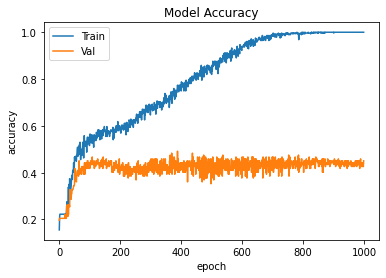

In [53]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

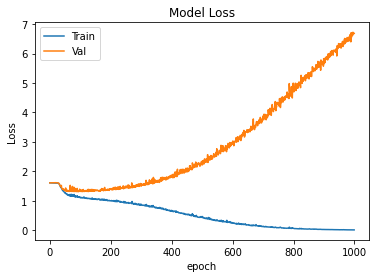

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

Test

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
new_image= plt.imread("/content/218630974_5646dafc63_m.jpg")
plt.imshow(new_image)

In [ ]:
from skimage.transform import resize
new_image_resized= resize(new_image, (32,32,3))#from skimage
plt.imshow(new_image_resized)

In [ ]:
pred=model.predict(np.array([new_image_resized,]))
classes=['daisy','dandelion','roses','sunflowers','tulips']
for i in range(len(pred[0])):
  if pred[0][i]==max(pred[0]):
    break
print(classes[i])